# Capítulo 2 - Fundamentos da Imagem Digital

In [ ]:
!rm -rf image_processing_tools

In [19]:
!git clone https://github.com/kevinruiz182/image_processing_tools.git

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 49 (delta 6), reused 47 (delta 4), pack-reused 0
Unpacking objects: 100% (49/49), 2.40 MiB | 7.20 MiB/s, done.


In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Redimensionar
Objetivo: Use a operação de redimensionamento com diferentes métodos de [interpolação](https://en.wikipedia.org/wiki/Multivariate_interpolation)

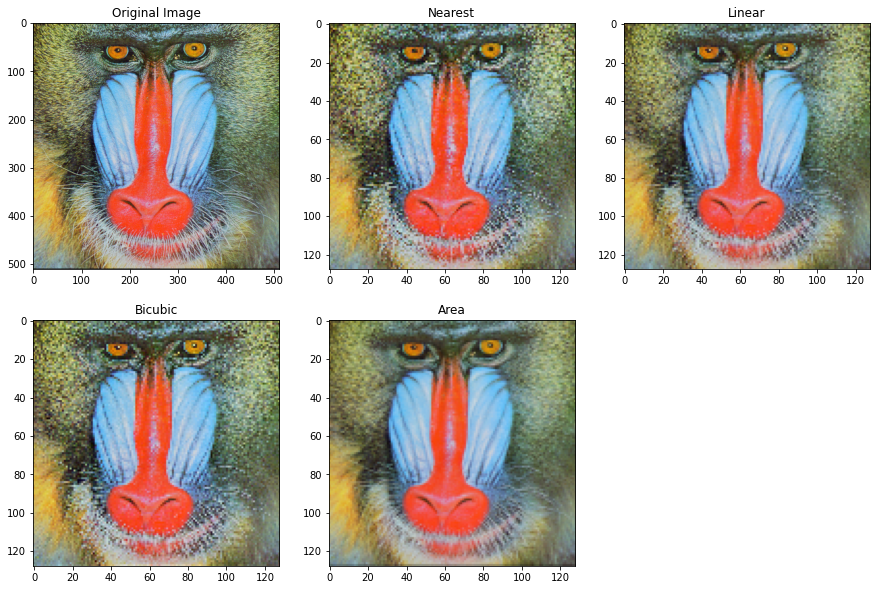

In [21]:
# Read an image
baboon_img = cv.imread('image_processing_tools/images/chapter02/baboon.jpg')[..., ::-1]

scale_factor  = 1/4
baboon_naer   = cv.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_NEAREST)
baboon_linear = cv.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_LINEAR)
baboon_cubic  = cv.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_CUBIC)
baboon_area   = cv.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_AREA)

plt.figure(figsize=(15, 10))
plt.subplot(231);plt.title('Original Image');plt.imshow(baboon_img)
plt.subplot(232);plt.title('Nearest');plt.imshow(baboon_naer)
plt.subplot(233);plt.title('Linear');plt.imshow(baboon_linear)
plt.subplot(234);plt.title('Bicubic');plt.imshow(baboon_cubic)
plt.subplot(235);plt.title('Area');plt.imshow(baboon_area);

In [22]:
baboon_img.dtype

dtype('uint8')

# Quantização de cores
Objetivo: Usar diferentes níveis de quantização em uma imagem em tons de cinza

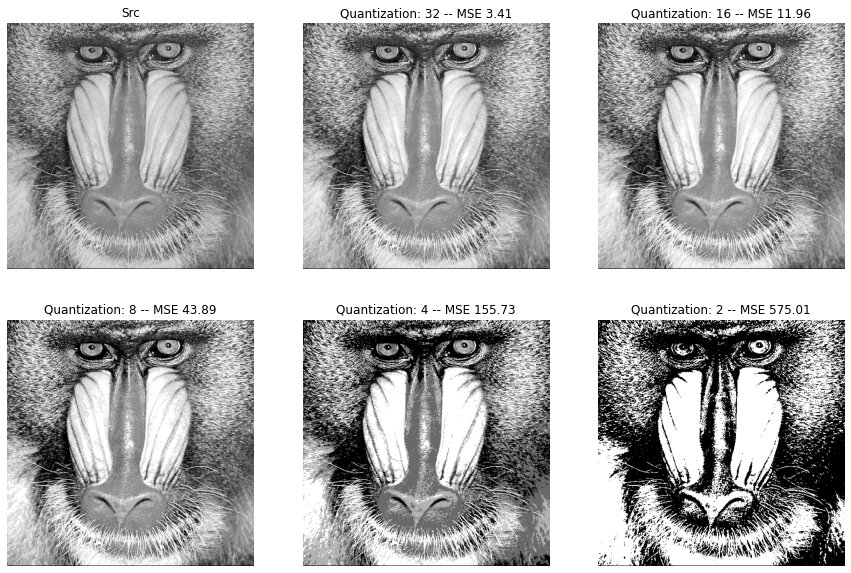

In [23]:
def get_segmented_img(src, num_colors=2):
    """ Return the src image with just num_colors. """
    vector             = src.reshape(-1).astype(np.float32) # 3 channel to 1 
    criteria           = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 5, 1.0)
    _, labels, centers = cv.kmeans(vector, num_colors, None, criteria, attempts=5, flags=cv.KMEANS_PP_CENTERS)
    # center: value of kmeans cluster center, in other words the final color 
    # label: index of associeted cluster per pixel

    labels_w_color  = centers[labels.flatten()] 
    segmented       = labels_w_color.reshape((src.shape)).astype(np.uint8)
    return segmented 

src = cv.imread('image_processing_tools/images/chapter02/baboon.jpg', 0)
num_colors_list = [32, 16, 8, 4, 2]

plt.figure(figsize=(15, 10))
plt.subplot(231);plt.title("Src");plt.axis('off');plt.imshow(src, cmap='gray')
for idx, num_colors in enumerate(num_colors_list):
    plt.subplot(2,3, idx + 2)
    seg = get_segmented_img(src, num_colors)
    mse = np.mean((src.astype(int) - seg) ** 2)
    plt.title(f"Quantization: {num_colors} -- MSE {mse:0.2f}");plt.axis('off')
    plt.imshow(seg, cmap='gray')

# Remoção de Ruído Aleatório
Alvo:


1.   Simular um ruído aleatório em N imagens
2.   Tentar remover esse ruído usando a média/mediana dessas imagens de ruído

In [24]:
#Load Image
lena_img  = cv.imread('image_processing_tools/images/chapter02/lena.jpg')[..., ::-1]

def get_n_noise_imgs(src, n_images=10, mean=0, std=10):
    """ Return a list of images with Gaussian noise. """

    lena_imgs = []
    for idx in range(n_images):
        random_noise = np.random.normal(mean, std, lena_img.shape).round()
        lena_n      = (lena_img + random_noise).clip(0, 255).astype(np.uint8)
        lena_imgs.append(lena_n)
        
    return lena_imgs    

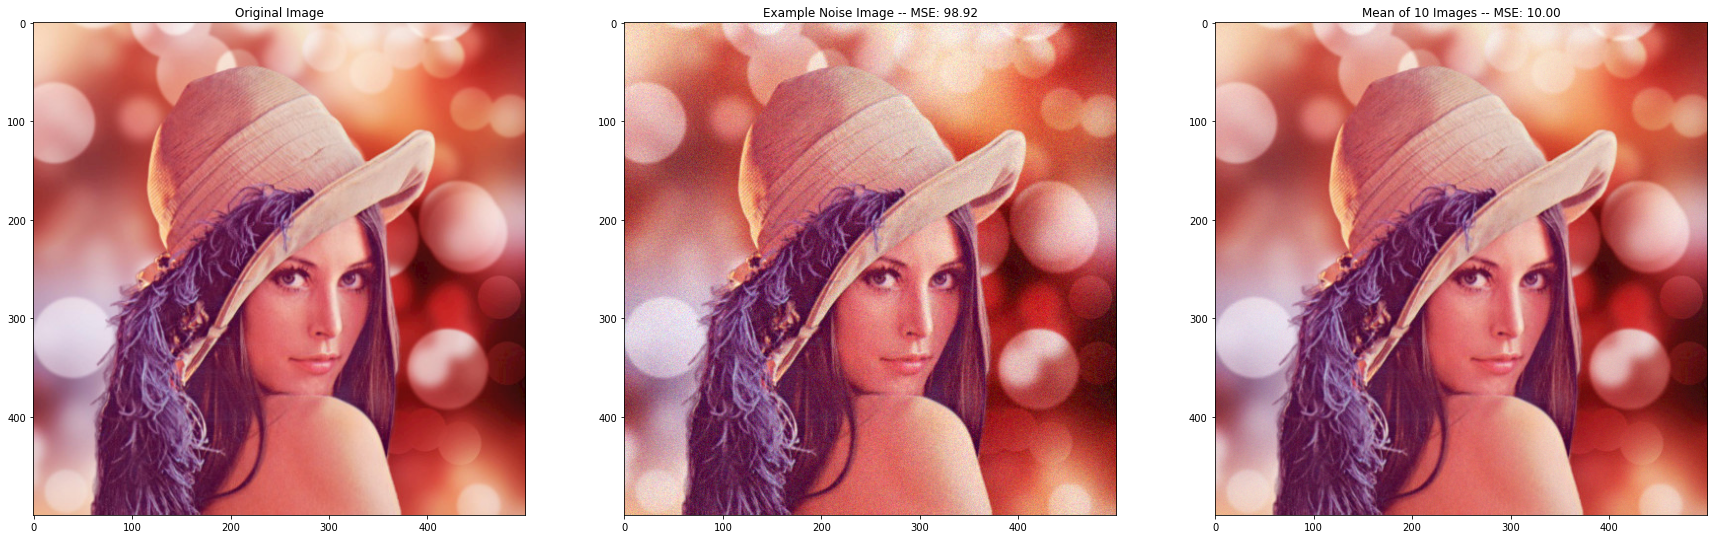

In [25]:
n_images   = 10
lena_imgs = get_n_noise_imgs(lena_img, n_images)
mean_img   = (np.sum(lena_imgs,axis=0)/len(lena_imgs)).round().astype(np.uint8)

mse_noise  = np.mean((lena_img.astype(int) - lena_imgs[0]) ** 2)
mse_mean   = np.mean((lena_img.astype(int) - mean_img) ** 2)

plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.title("Original Image");
plt.imshow(lena_img)
plt.subplot(132)
plt.title(f"Example Noise Image -- MSE: {mse_noise:0.2f}")
plt.imshow(lena_imgs[0].astype(np.uint8))
plt.subplot(133)
plt.title(f"Mean of {len(lena_imgs)} Images -- MSE: {mse_mean:0.2f}")
plt.imshow(mean_img);

## Plot MSE

<ipython-input-26-965c52506e1c>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mse_mean  = np.mean((lena_img.astype(np.int) - mean_img) ** 2)


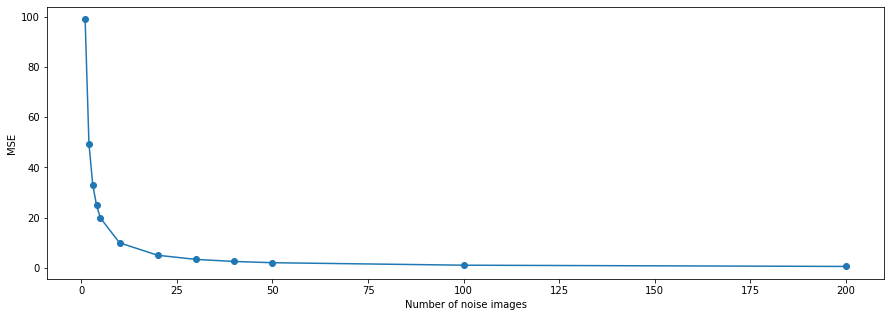

In [26]:
n_images_list = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
mse = []
for n_images in n_images_list:
    lena_imgs = get_n_noise_imgs(lena_img, n_images)
    mean_img   = (np.sum(lena_imgs,axis=0)/len(lena_imgs)).round().astype(np.uint8)

    mse_mean  = np.mean((lena_img.astype(np.int) - mean_img) ** 2)
    mse.append(mse_mean)   

plt.figure(figsize=(15, 5))
plt.plot(n_images_list, mse, marker='o', label='Mean')
plt.ylabel("MSE")
plt.xlabel('Number of noise images')
plt.plot();